In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
appdf=pd.read_csv("C:\\Users\\pc\\Downloads\\Country-data.csv")
appdf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
appdf.shape

(167, 10)

In [3]:
appdf.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
appdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [60]:
# missing values
round(100*(appdf.isnull().sum())/len(appdf), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [5]:
appdf.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

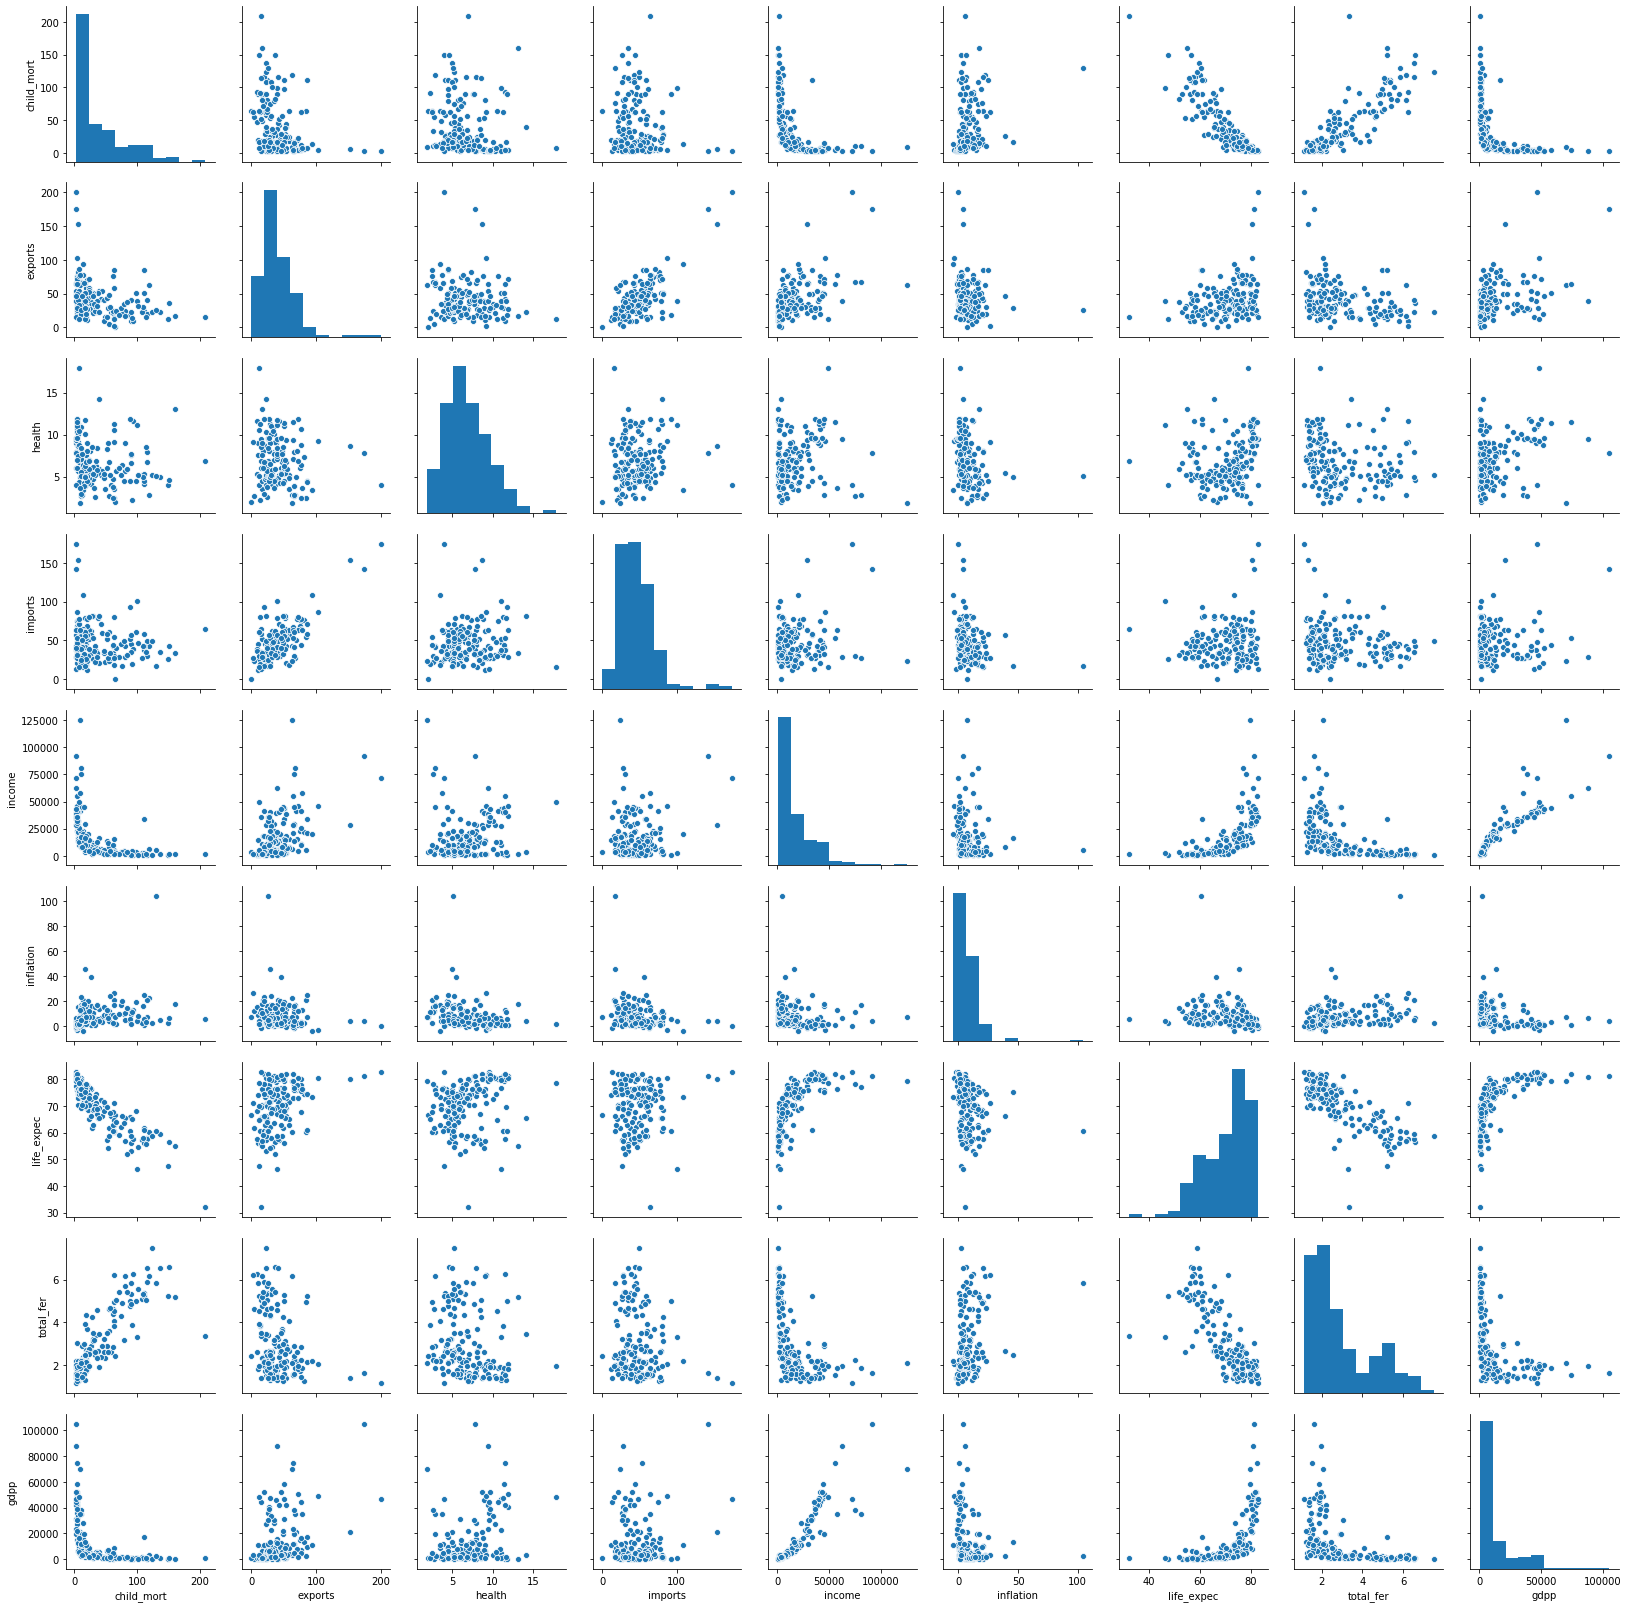

In [6]:
sns.pairplot(appdf)
plt.show()

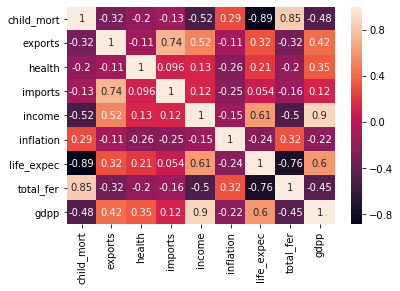

In [7]:
sns.heatmap(appdf.corr(), annot = True);

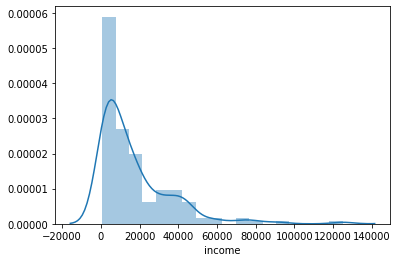

In [9]:
sns.distplot(appdf.income) # numeric

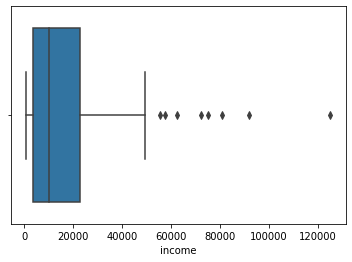

In [10]:
sns.boxplot(appdf.income) # numeric

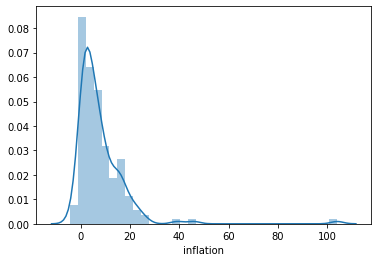

In [11]:
sns.distplot(appdf.inflation)

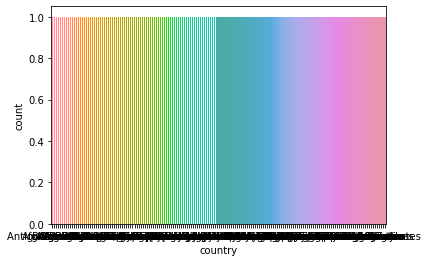

In [12]:
sns.countplot(appdf.country) # categorical

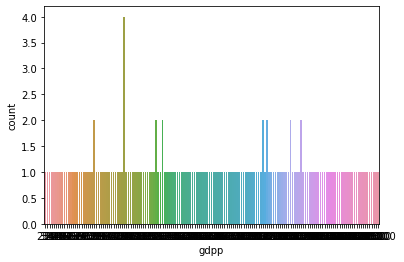

In [13]:

sns.countplot(appdf.gdpp)

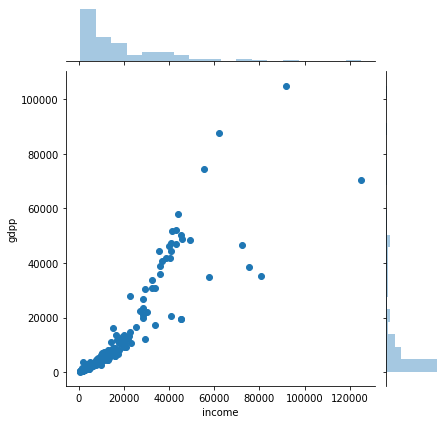

In [14]:

## Bivariate analysis
sns.jointplot('income', 'gdpp', data = appdf, kind='scatter')

In [61]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
	    low = .05
	    high = .95
	    quant_df = df.quantile([low, high])
	    for name in list(df.columns):
	      if is_numeric_dtype(df[name]):
	       df = df[(df[name] > quant_df.loc[low, name]) 
               & (df[name] < quant_df.loc[high, name])]
	    return df
fnldf = remove_outlier(appdf)

In [62]:
# 2. rescaling
rfm_df = fnldf[['gdpp', 'child_mort','income']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(88, 3)

In [63]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['gdpp', 'child_mort','income']
rfm_df_scaled.head()

,gdpp,child_mort,income
0,-0.415292,-0.496188,-0.309942
1,-0.378724,-0.091607,-0.029040
2,0.386226,-0.734400,0.557354
3,-0.501274,-0.439471,-0.615435
4,3.815656,-0.961268,2.836725


In [64]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
kmeans.labels_

array([0, 0, 3, 0, 1, 0, 1, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 0, 2, 1, 0, 3,
       0, 2, 3, 2, 3, 1, 0, 0, 0, 0, 3, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 3,
       0, 0, 0, 3, 2, 2, 2, 3, 3, 3, 0, 0, 2, 3, 3, 0, 2, 1, 3, 0, 0, 0,
       3, 3, 3, 0, 1, 2, 3, 3, 0, 3, 2, 2, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0])

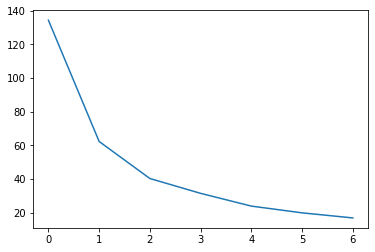

In [66]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [67]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6102998392072905
For n_clusters=3, the silhouette score is 0.5340743613405355
For n_clusters=4, the silhouette score is 0.46132735087138693
For n_clusters=5, the silhouette score is 0.44957526039061596
For n_clusters=6, the silhouette score is 0.4395256922957763
For n_clusters=7, the silhouette score is 0.40261287204376245
For n_clusters=8, the silhouette score is 0.3992605776548373


In [68]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
kmeans.labels_

array([1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1,
       1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1])

In [71]:
# assign the label
fnldf['cluster_id'] = kmeans.labels_
fnldf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2


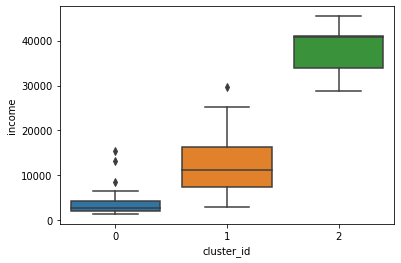

In [74]:
# plot
sns.boxplot(x='cluster_id', y='income', data=fnldf)

In [75]:
fnldf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2


In [76]:
rfm_df_scaled.head()

,gdpp,child_mort,income
0,-0.415292,-0.496188,-0.309942
1,-0.378724,-0.091607,-0.029040
2,0.386226,-0.734400,0.557354
3,-0.501274,-0.439471,-0.615435
4,3.815656,-0.961268,2.836725


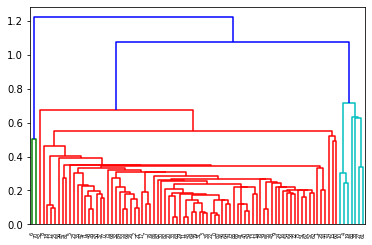

In [77]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

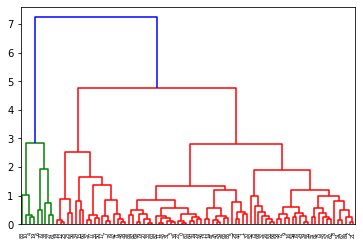

In [78]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [79]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [80]:
# assign cluster labels
fnldf['cluster_labels'] = cluster_labels
fnldf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,1


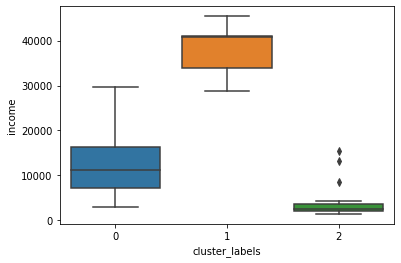

In [82]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=fnldf)

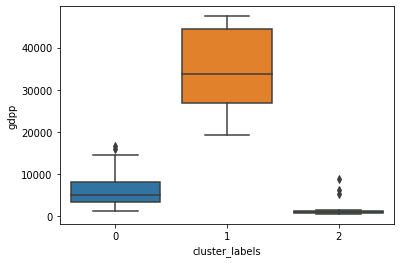

In [83]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=fnldf)

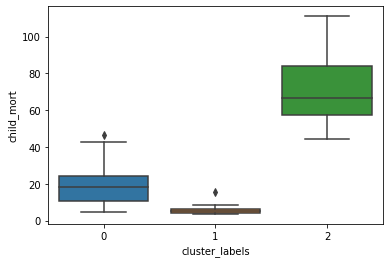

In [84]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=fnldf)

In [103]:
fnldf.groupby('cluster_labels').gdpp.mean()

cluster_labels
0     6405.833333
1    34333.333333
2     1913.157895
Name: gdpp, dtype: float64

In [108]:
fnldf[fnldf.cluster_labels == 2].sort_values('gdpp',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
56,Gambia,80.3,23.8,5.69,42.7,1660,4.300,65.5,5.71,562,0,2
147,Tanzania,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702,0,2
146,Tajikistan,52.4,14.9,5.98,58.6,2110,12.500,69.6,3.51,738,0,2
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,0,2
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0,2
